In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler , LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv('/content/placement.csv')

In [5]:
df



,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [ ]:

df.isna().sum()

In [9]:
df.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [10]:
df=df.drop(columns=['Unnamed: 0','placement'])

In [11]:
std=StandardScaler()

In [12]:
wcsc=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i,random_state=0)
  kmean.fit(df)
  wcsc.append(kmean.inertia_)

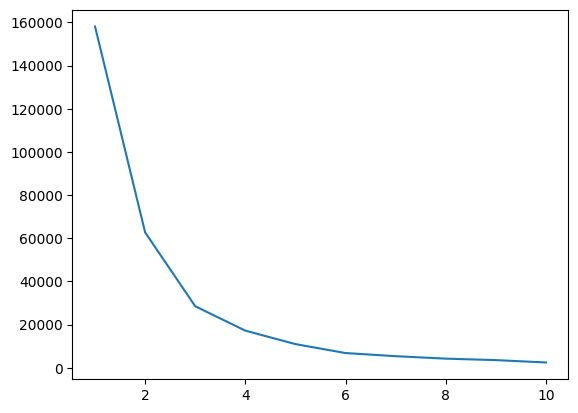

In [13]:
plt.plot(range(1,11),wcsc)
plt.show()

In [14]:
#here we have got elbow at 4

model=KMeans(n_clusters=4,random_state=0)
model.fit(df)
predict=model.predict(df)

In [15]:
print(predict)

[3 3 3 0 0 1 0 1 0 1 1 0 0 3 3 2 2 2 3 0 3 0 3 3 3 3 2 3 3 3 0 3 0 0 2 3 0
 0 0 0 0 3 3 0 1 1 3 0 0 0 2 0 2 2 0 3 1 0 1 3 0 0 3 0 1 2 3 3 1 3 0 0 3 1
 0 2 0 1 1 3 2 3 1 0 2 2 0 0 0 0 3 0 3 3 1 2 1 2 3 3]


In [16]:
#drawing scatter plot for all the clusters

In [17]:
x=np.array([5.9,3]).reshape(1,-1)
x.reshape(1,-1)
model.predict(x)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [18]:
centers=pd.DataFrame(model.cluster_centers_)
centers

,0,1
0,6.147222,141.250000
1,5.981250,59.687500
2,5.633333,184.600000
3,5.987879,107.545455


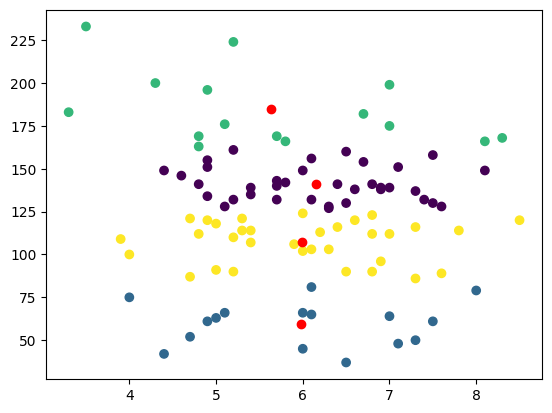

In [19]:
# plot of clusters
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=predict)
plt.scatter(centers.iloc[:,0],centers.iloc[:,1],c='red')
plt.show()